In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Ras Anjing/Data Ras Anjing')

In [32]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, rotation_range=20,
                             width_shift_range=0.1, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',subset='training')
val_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 488 images belonging to 8 classes.
Found 48 images belonging to 8 classes.


In [35]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

vgg_base.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
16/16 [==============================] - 356s 23s/step - loss: 2.6337 - accuracy: 0.1475 - val_loss: 1.9432 - val_accuracy: 0.2083
Epoch 2/20
16/16 [==============================] - 359s 23s/step - loss: 2.0715 - accuracy: 0.2254 - val_loss: 1.7404 - val_accuracy: 0.3750
Epoch 3/20
16/16 [==============================] - 354s 22s/step - loss: 1.8038 - accuracy: 0.3586 - val_loss: 1.6759 - val_accuracy: 0.3542
Epoch 4/20
16/16 [==============================] - 362s 23s/step - loss: 1.6377 - accuracy: 0.4139 - val_loss: 1.6039 - val_accuracy: 0.4583
Epoch 5/20
16/16 [==============================] - 352s 22s/step - loss: 1.4737 - accuracy: 0.4857 - val_loss: 1.4973 - val_accuracy: 0.5417
Epoch 6/20
16/16 [==============================] - 362s 23s/step - loss: 1.3961 - accuracy: 0.5061 - val_loss: 1.4071 - val_accuracy: 0.4167
Epoch 7/20
16/16 [==============================] - 354s 22s/step - loss: 1.2738 - accuracy: 0.5717 - val_loss: 1.4135 - val_accuracy: 0.5000
Epoch 

In [30]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
16/16 [==============================] - 381s 24s/step - loss: 3.2397 - accuracy: 0.1434 - val_loss: 2.1131 - val_accuracy: 0.2708
Epoch 2/20
16/16 [==============================] - 350s 22s/step - loss: 2.4533 - accuracy: 0.2848 - val_loss: 2.0238 - val_accuracy: 0.3125
Epoch 3/20
16/16 [==============================] - 350s 22s/step - loss: 2.0824 - accuracy: 0.3770 - val_loss: 2.0376 - val_accuracy: 0.3125
Epoch 4/20
16/16 [==============================] - 353s 22s/step - loss: 2.0071 - accuracy: 0.3627 - val_loss: 1.7681 - val_accuracy: 0.2500
Epoch 5/20
16/16 [==============================] - 352s 22s/step - loss: 1.8049 - accuracy: 0.4406 - val_loss: 1.6307 - val_accuracy: 0.3750
Epoch 6/20
16/16 [==============================] - 349s 22s/step - loss: 1.6789 - accuracy: 0.4898 - val_loss: 1.6143 - val_accuracy: 0.3542
Epoch 7/20
16/16 [==============================] - 351s 22s/step - loss: 1.5606 - accuracy: 0.5020 - val_loss: 1.5904 - val_accuracy: 0.4792
Epoch 

In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
16/16 [==============================] - 395s 24s/step - loss: 2.3483 - accuracy: 0.1783 - val_loss: 2.0569 - val_accuracy: 0.1667
Epoch 2/20
16/16 [==============================] - 361s 24s/step - loss: 1.9709 - accuracy: 0.2602 - val_loss: 1.8056 - val_accuracy: 0.3958
Epoch 3/20
16/16 [==============================] - 359s 22s/step - loss: 1.7645 - accuracy: 0.3443 - val_loss: 1.5962 - val_accuracy: 0.5625
Epoch 4/20
16/16 [==============================] - 352s 22s/step - loss: 1.5986 - accuracy: 0.4447 - val_loss: 1.5624 - val_accuracy: 0.4792
Epoch 5/20
16/16 [==============================] - 354s 22s/step - loss: 1.5079 - accuracy: 0.4426 - val_loss: 1.4259 - val_accuracy: 0.5208
Epoch 6/20
16/16 [==============================] - 365s 23s/step - loss: 1.4331 - accuracy: 0.5123 - val_loss: 1.5095 - val_accuracy: 0.5000
Epoch 7/20
16/16 [==============================] - 357s 22s/step - loss: 1.3530 - accuracy: 0.5266 - val_loss: 1.4105 - val_accuracy: 0.5417
Epoch 

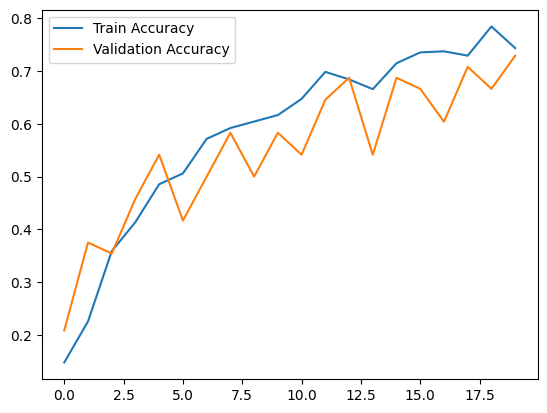

In [37]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

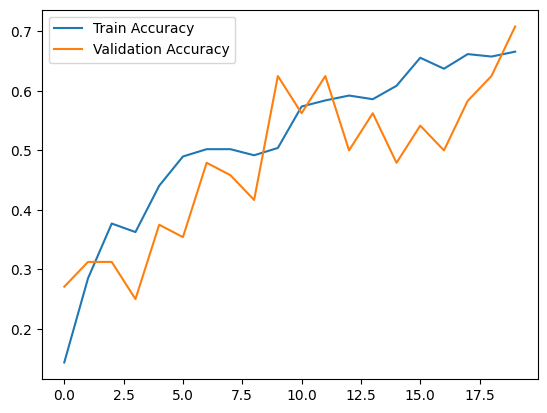

In [31]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

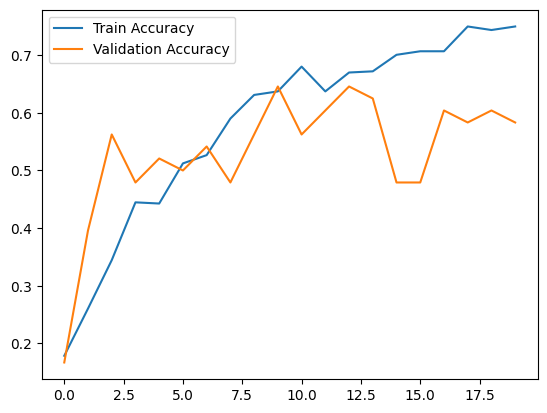

In [ ]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

2/2 [==============================] - 31s 8s/step - loss: 0.9531 - accuracy: 0.6667
Validation Loss: 0.9530763030052185
Validation Accuracy: 0.6666666865348816
2/2 [==============================] - 32s 10s/step


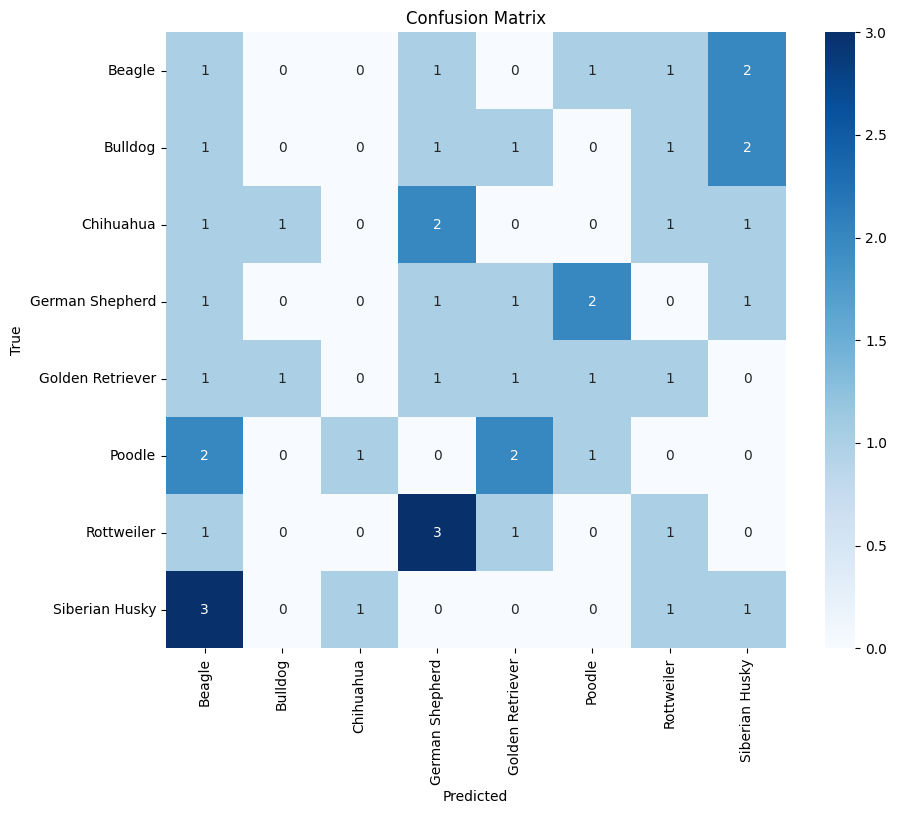

                  precision    recall  f1-score   support

          Beagle       0.09      0.17      0.12         6
         Bulldog       0.00      0.00      0.00         6
       Chihuahua       0.00      0.00      0.00         6
 German Shepherd       0.11      0.17      0.13         6
Golden Retriever       0.17      0.17      0.17         6
          Poodle       0.20      0.17      0.18         6
      Rottweiler       0.17      0.17      0.17         6
  Siberian Husky       0.14      0.17      0.15         6

        accuracy                           0.12        48
       macro avg       0.11      0.12      0.11        48
    weighted avg       0.11      0.12      0.11        48



In [38]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_labels = list(val_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [42]:
def predict_image(img):
  img = load_img(img, target_size=(224, 224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  class_indices = {v: k for k, v in train_generator.class_indices.items()}
  max_index = np.argmax(prediction)
  result = {class_indices[max_index]: float(prediction[max_index])}
  return result

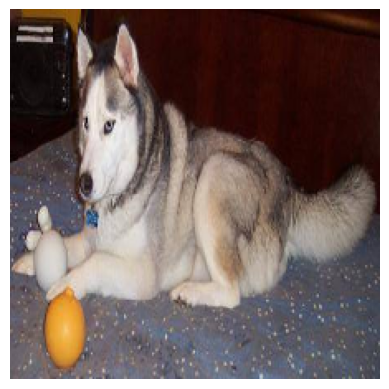

1/1 [==============================] - 1s 920ms/step


{'Siberian Husky': 1.0}

In [52]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Ras Anjing/Data Ras Anjing/Siberian Husky/0c9fc0f58a6724ca680c76785a452bba.jpg')

In [53]:
model.save("Model4VGG RasAnjing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model.save("Model4VGG RasAnjing.keras")